# Coursera Capstone Project – The Battle of Neighborhoods

British Columbia (BC) is the westernmost province in Canada, located between the Pacific Ocean and the Rocky Mountains. With an estimated population of 5.1 million as of 2020, it is Canada's third-most populous province. 

According to the 2016 National Household Survey 365,705 British Columbians had South Asian origins. This accounted for just over 8% of the total provincial population. The growth of the population is attributed to sustained invitations of immigration from South Asian nations. The vast majority of South Asian immigrants who immigrate to and reside in British Columbia trace their roots to the Punjab region of India and Pakistan; the province has the largest Punjabi population in Canada. According to a 2011 study conducted by Statistics Canada British Columbians from South Asia will grow to between 508,000 and 684,000 by 2036 or 10% to 11.1% of the provincial population overall.

With this diverse culture, comes diversity in cuisines. There are many different restaurants in British Columbia, catering to varied tastes with cuisines like Indian, Chinese, French, etc.

As part of this project, we will list and visualize all major parts of British Columbia that have great Indian Restaurants.

# Data
For this project we need the following data:

•	British Columbia Data: contains a list of Boroughs, Neighborhoods along with their location coordinates.

•	Data source: http://www.geonames.org/postal-codes/CA/BC/british-columbia.html 

•	Description: This webpage contains the required information. And we will scrape this data set to explore various neighborhoods of Britih Columbia.

•	Indian Restaurants in each neighborhood of British COlumbia

•	Data source: Foursquare API

•	Description: By using this API we will get all the venues in each neighborhood. We can filter these venues to get only Indian Restaurants.

•	We can then get the likes, ratings, etc., to rank the restaurants.

•	GeoSpace Data:

•	Data source: ‘pgeocode’ library of Python.

•	By using this data we draw boundaries and visualize venues on the map.


# Approach
•View the Toronto's city data from: http://www.geonames.org/postal-codes/CA/BC/british-columbia.html

•Using Web Scrapping technique, collect required data.

•Using Foursquare API, we will find all venues for each neighborhood.

•Filter out all venues that are Indian Restaurants.

•Find rating, tips and like count for each Indian Restaurants using Foursquare API.

•Using rating for each restaurant, we will sort that data.

•Visualize the Ranking of neighborhoods using folium library(python)

# Questions that can be asked using the above-mentioned datasets

1)What is best location in Toronto for Indian Cuisine?

2)Which areas have potential Indian Restaurant Market?

3)Which all areas lack Indian Restaurants?

4)Which is the best place to stay if I prefer Indian Cuisine?

# Importing Libraries

In [36]:
import pandas as pd
import numpy as np
import requests
from geopy.geocoders import Nominatim
import folium
import json
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns

import pgeocode

You should consider upgrading via the 'c:\users\aryan\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\aryan\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


# Extracting Data from WebPage and Transforming into DataFrame

In [2]:
df=pd.read_html("http://www.geonames.org/postal-codes/CA/BC/british-columbia.html")[2]

In [3]:
df=df.iloc[::2]

In [4]:
df.reset_index(inplace=True)
df.drop('index',1,inplace=True)
df.drop('Unnamed: 0',1,inplace=True)
df.drop(192,inplace=True)
df.drop('Country',1,inplace=True)
df.drop('Admin3',1,inplace=True)
df.rename(columns={'Admin2':'Borough','Place':'Neighbourhood'},inplace=True)
df.drop('Admin1',1,inplace=True)
df=df.dropna()
df=df.reset_index(drop=True)


In [5]:
df=df[['Code','Borough','Neighbourhood']]

In [6]:
df

,Code,Borough,Neighbourhood
0,V2H,Kamloops,Kamloops North
1,V2K,Prince George,Prince George North
2,V2L,Prince George,Prince George East Central
3,V2M,Prince George,Prince George West Central
4,V2N,Prince George,Prince George South
...,...,...,...
119,V6A,Vancouver,Vancouver (Strathcona / Chinatown / Downtown E...
120,V6B,Vancouver,Vancouver (NE Downtown / Harbour Centre / Gast...
121,V7A,Richmond,Richmond South
122,V1B,Vernon,Vernon East


In [7]:
def get_lat_long(postalcode):
    nomi=pgeocode.Nominatim('ca')
    query=nomi.query_postal_code(postalcode)
    latitude=query['latitude']
    longitude=query['longitude']
    return latitude,longitude
    
    

In [8]:
addlist=[]
for post in df['Code']:
    coord=get_lat_long(post)
    addlist.append(coord)
addlist
    

[(50.7262, -120.1659),
 (54.0508, -122.9221),
 (53.9078, -122.7473),
 (53.9127, -122.8708),
 (53.6408, -122.954),
 (49.1838, -121.9046),
 (49.076, -121.9883),
 (49.0423, -122.2835),
 (49.0384, -122.3485),
 (49.2068, -122.4851),
 (49.2196, -122.6164),
 (49.1285, -122.6236),
 (49.0483, -122.5997),
 (49.2436, -122.7865),
 (49.3167, -122.7384),
 (49.265, -122.8716),
 (49.2366, -122.8521),
 (49.2201, -122.8998),
 (49.1886, -122.9384),
 (49.1948, -122.8131),
 (49.0791, -122.7553),
 (49.1894, -122.8454),
 (49.1889, -122.873),
 (49.14100000000001, -122.8569),
 (49.1067, -122.8576),
 (49.1551, -122.9124),
 (49.1197, -122.9056),
 (49.1464, -123.0137),
 (49.0986, -123.0318),
 (49.0418, -123.0591),
 (49.0331, -123.0877),
 (49.1707, -122.7326),
 (49.0561, -122.8302),
 (49.274, -123.0074),
 (49.2272, -122.9574),
 (49.2478, -122.9938),
 (49.2302, -122.9952),
 (49.2038, -122.9921),
 (49.2807, -123.0397),
 (49.2795, -123.0667),
 (49.26, -123.0398),
 (49.2551, -123.0667),
 (49.222, -123.0683),
 (49.2397

In [9]:
latlist=[]
longlist=[]
for i,j in addlist:
    latlist.append(i)
    longlist.append(j)
    

In [10]:
df['Latitude']=latlist
df['Longitude']=longlist

In [11]:
df.rename(columns={'Code':'PostalCode'},inplace=True)

In [12]:
df

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,V2H,Kamloops,Kamloops North,50.7262,-120.1659
1,V2K,Prince George,Prince George North,54.0508,-122.9221
2,V2L,Prince George,Prince George East Central,53.9078,-122.7473
3,V2M,Prince George,Prince George West Central,53.9127,-122.8708
4,V2N,Prince George,Prince George South,53.6408,-122.9540
...,...,...,...,...,...
119,V6A,Vancouver,Vancouver (Strathcona / Chinatown / Downtown E...,49.2779,-123.0908
120,V6B,Vancouver,Vancouver (NE Downtown / Harbour Centre / Gast...,49.2788,-123.1139
121,V7A,Richmond,Richmond South,49.1205,-123.1171
122,V1B,Vernon,Vernon East,50.0840,-118.9380


# Visualizing Map of British Columbia

In [13]:
# create map of BC using latitude and longitude values
map_bc = folium.Map(location=get_lat_long('V6A'), zoom_start=10,tiles='https://api.mapbox.com/styles/v1/explorer020/cka9yy2dn14l51iptugr1shzf/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiZXhwbG9yZXIwMjAiLCJhIjoiY2thOXhvYjdyMHJoYzJycDRlbmw3YTg3ZiJ9.T9QjJc87oYLSknnlBH21Tg',attr='XXX Mapbox Attribution') # calling the geo_location function by passing address as Toronto.

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='Green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bc)  
    
map_bc

# Loading Foursquare API for exploring location

In [14]:

CLIENT_ID = ''
CLIENT_SECRET = ''  # your Foursquare Secret
VERSION = '20200126' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' , CLIENT_ID)
print('CLIENT_SECRET:',CLIENT_SECRET)

Your credentails:
CLIENT_ID:  YJKGLDP5YWHU3MEP2F2OTPW53RRLNRQQYIY21KU5L0RVYNW1
CLIENT_SECRET: FRS1CGWEIEC0WHFPB3DMWEL44CV0DSLRHVZMN4FW2D3CPLM2


# Defining a Function to get list of neighborhood

In [15]:
def get_venues(lat,lng):
    
    #set variables
    radius=3000
    LIMIT=100
     
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    #results = json_normalize(results)
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df1 = pd.DataFrame(venue_details,columns=column_names)
    return df1

# Defining a function to get venue details like like count , rating , tip counts for a given venue id. This will be used for ranking.

In [16]:
def get_venue_details(venue_id):
    
   #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
           venue_id,
           CLIENT_ID, 
           CLIENT_SECRET, 
           VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df2 = pd.DataFrame(venue_details,columns=column_names)
    return df2

# Visualizing No. of Neighborhood in each Borough

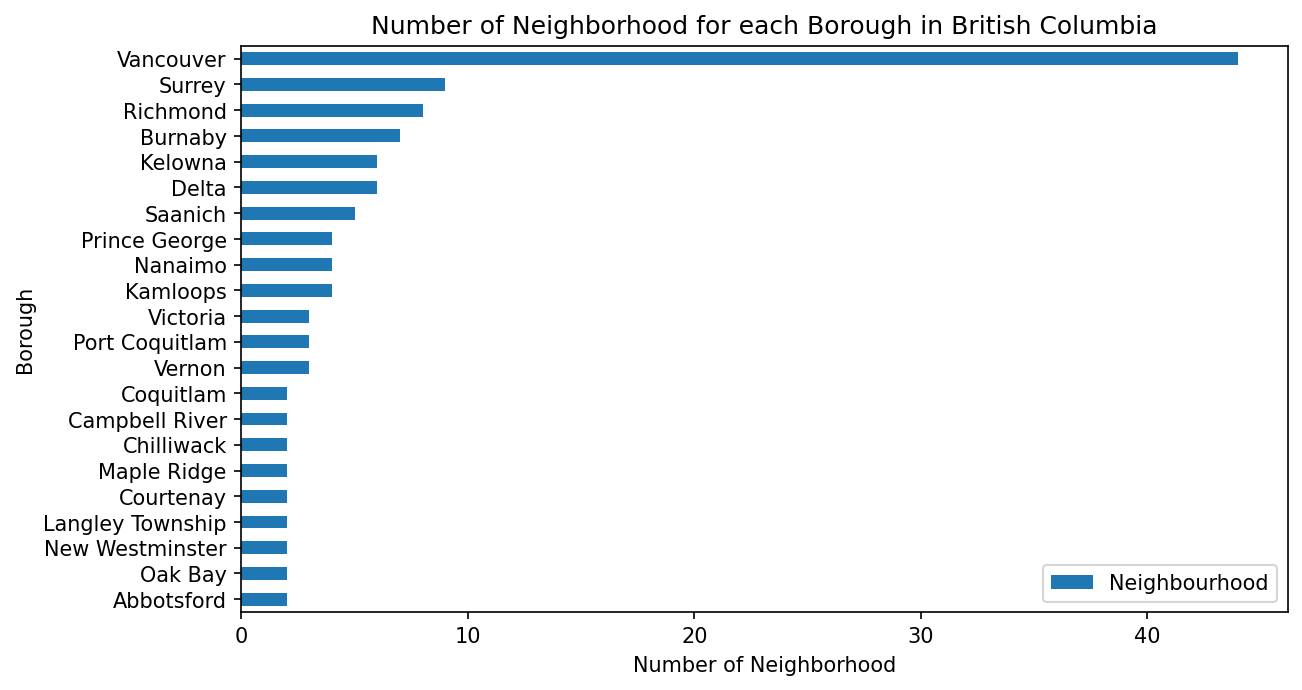

In [17]:
plt.figure(figsize=(9,5), dpi=150)
# title
plt.title('Number of Neighborhood for each Borough in British Columbia')
#On x-axis
plt.xlabel('Number of Neighborhood', fontsize = 10)
#On y-axis
plt.ylabel('Borough', fontsize=10)
#giving a bar plot
df.groupby('Borough')['Neighbourhood'].count().sort_values().plot(kind='barh')
#legend
plt.legend()
#displays the plot
plt.show()

# Vancouver has the maximum number of Neighborhood, followed by Surrey and Richmond
Let us find out number of Indian Restaurants in the top 4 neighbourhoods.

In [18]:
df_1=df.loc[df['Borough'].isin(['Vancouver','Surrey','Richmond','Burnaby'])]
df_1.reset_index(drop=True)

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,V3R,Surrey,Surrey North,49.1948,-122.8131
1,V3S,Surrey,Surrey East,49.0791,-122.7553
2,V3T,Surrey,Surrey Inner Northwest,49.1894,-122.8454
3,V3V,Surrey,Surrey Outer Northwest,49.1889,-122.8730
4,V3W,Surrey,Surrey Upper West,49.1410,-122.8569
...,...,...,...,...,...
63,V5A,Burnaby,Burnaby (Government Road / Lake City / SFU / B...,49.2640,-122.9369
64,V5B,Burnaby,Burnaby (Parkcrest-Aubrey / Ardingley-Sprott),49.2769,-122.9761
65,V6A,Vancouver,Vancouver (Strathcona / Chinatown / Downtown E...,49.2779,-123.0908
66,V6B,Vancouver,Vancouver (NE Downtown / Harbour Centre / Gast...,49.2788,-123.1139


In [19]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighbourhood', 'ID','Name']
indian_rest_bc=pd.DataFrame(columns=column_names)
count=1
for row in df_1.values.tolist():
    Postcode, Borough, Neighbourhood, Latitude, Longitude = row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(df_1),')','Indian Resturants in '+Neighbourhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_bc = indian_rest_bc.append({'Borough': Borough,
                                                'Neighbourhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 68 ) Indian Resturants in Surrey North, Surrey:1
( 2 / 68 ) Indian Resturants in Surrey East, Surrey:0
( 3 / 68 ) Indian Resturants in Surrey Inner Northwest, Surrey:1
( 4 / 68 ) Indian Resturants in Surrey Outer Northwest, Surrey:4
( 5 / 68 ) Indian Resturants in Surrey Upper West, Surrey:7
( 6 / 68 ) Indian Resturants in Surrey Lower West, Surrey:1
( 7 / 68 ) Indian Resturants in Surrey Northeast, Surrey:0
( 8 / 68 ) Indian Resturants in Surrey South, Surrey:1
( 9 / 68 ) Indian Resturants in Burnaby (Burnaby Heights / Willingdon Heights / West Central Valley), Burnaby:1
( 10 / 68 ) Indian Resturants in Burnaby (Lakeview-Mayfield / Richmond Park / Kingsway-Beresford), Burnaby:0
( 11 / 68 ) Indian Resturants in Burnaby (Cascade-Schou / Douglas-Gilpin), Burnaby:2
( 12 / 68 ) Indian Resturants in Burnaby (Maywood / Marlborough / Oakalla / Windsor), Burnaby:1
( 13 / 68 ) Indian Resturants in Burnaby (Suncrest / Sussex-Nelson / Clinton-Glenwood / West Big Bend), Burnaby:0
( 14 / 68 )

In [20]:
print(indian_rest_bc.shape)
print(indian_rest_bc.isnull().sum())
indian_rest_bc.head()


(69, 4)
Borough          0
Neighbourhood    0
ID               0
Name             0
dtype: int64


,Borough,Neighbourhood,ID,Name
0,Surrey,Surrey North,4ac95ec4f964a520c9bf20e3,Taste of Punjab
1,Surrey,Surrey Inner Northwest,4ac95ec4f964a520c9bf20e3,Taste of Punjab
2,Surrey,Surrey Outer Northwest,4b63a846f964a520368a2ae3,Mahek Restaurant & Lounge
3,Surrey,Surrey Outer Northwest,4e9a53f402d5df1b5037ed69,Krishna's Dosa Grill
4,Surrey,Surrey Outer Northwest,4b93033df964a520b52e34e3,Mirch Masala


# We have got 69 Indian Restaurants!
## Let us look at Indian Restaurants in each Borough

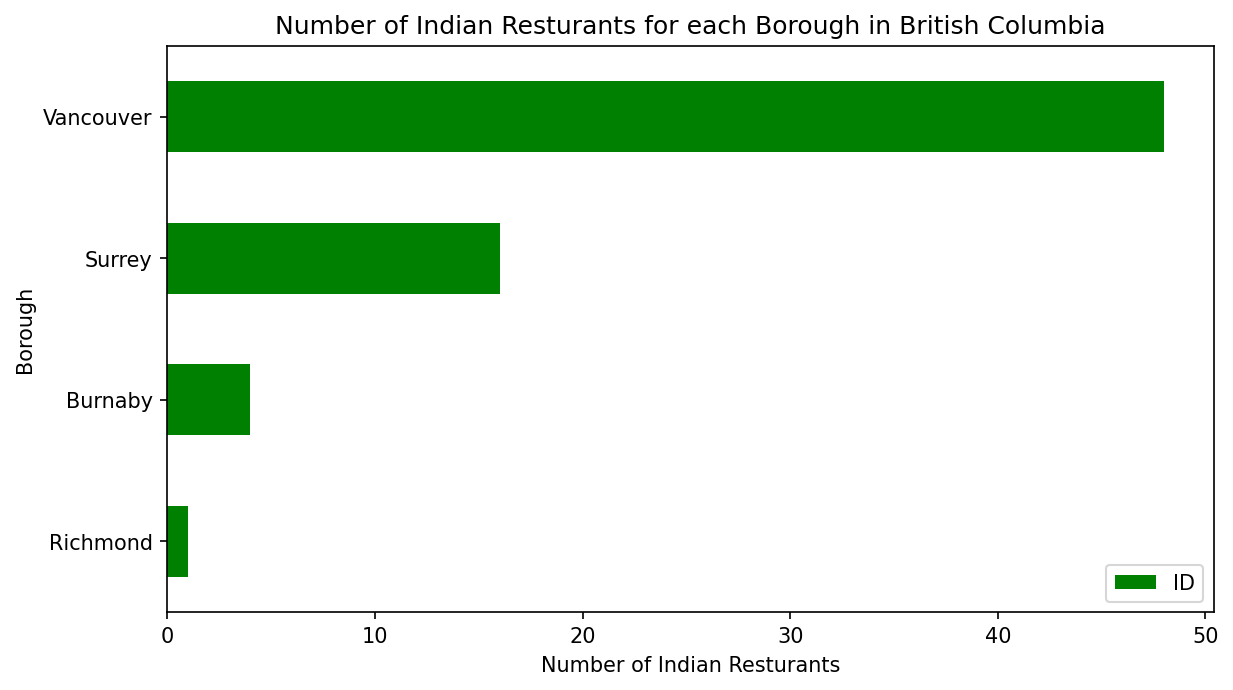

In [21]:

plt.figure(figsize=(9,5), dpi = 150)
# title
plt.title('Number of Indian Resturants for each Borough in British Columbia')
#On x-axis
plt.xlabel('Number of Indian Resturants', fontsize = 10)
#On y-axis
plt.ylabel('Borough', fontsize=10)
#giving a bar plot
indian_rest_bc.groupby('Borough')['ID'].count().sort_values().plot(kind='barh',color='Green')
#legend
plt.legend()
#displays the plot
plt.show()

# Which Neighborhood has the highest number of Indian Restaurants?

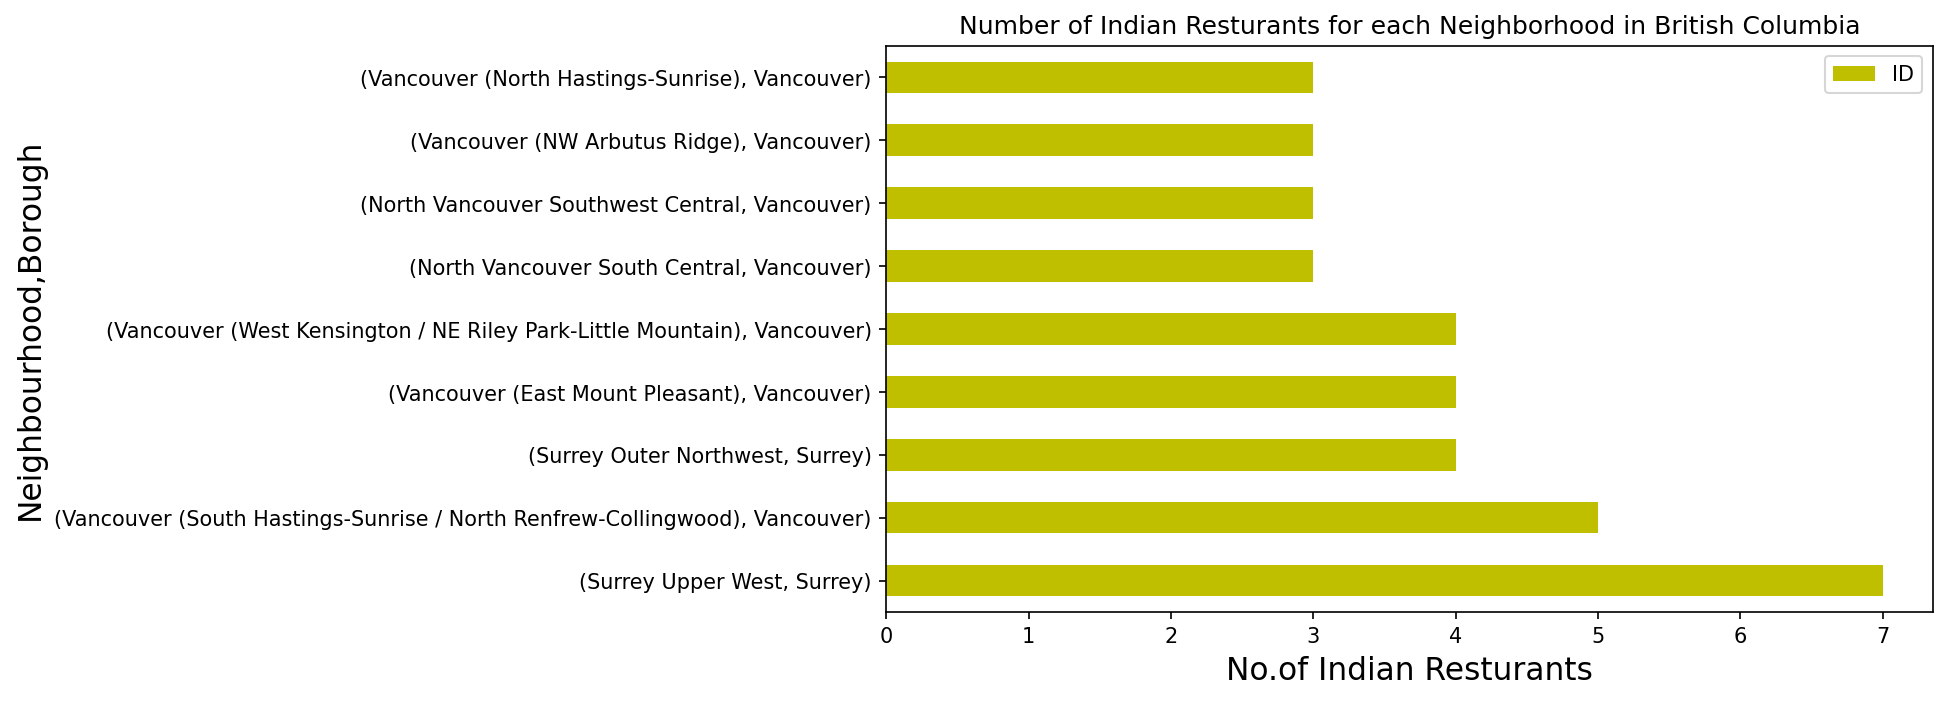

In [22]:
plt.figure(figsize=(9,5), dpi = 150)
# title
plt.title('Number of Indian Resturants for each Neighborhood in British Columbia')
#On x-axis
plt.xlabel('No.of Indian Resturants', fontsize = 15)
#On y-axis
plt.ylabel('Neighborhood', fontsize=15)
#giving a bar plot
#indian_rest_toronto.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='barh', color='y')
indian_rest_bc.groupby(['Neighbourhood','Borough'])['ID'].count().nlargest(9).plot(kind='barh', color='y')


#legend
plt.legend()
#displays the plot
plt.show()

# Lets find out the Indian Restaurants in Vancouver.

In [23]:
rest_list_vanc=indian_rest_bc[indian_rest_bc['Borough']=='Vancouver']
rest_list_vanc

,Borough,Neighbourhood,ID,Name
19,Vancouver,Vancouver (North Hastings-Sunrise),50ada0e0e4b03c6b1ca797ff,Curry Zone
20,Vancouver,Vancouver (North Hastings-Sunrise),4ab99baef964a520008020e3,Tandoori Palace
21,Vancouver,Vancouver (North Hastings-Sunrise),4f73c020e4b0ab2907d5a86f,Siddhartha's
22,Vancouver,Vancouver (South Hastings-Sunrise / North Renf...,4dacac2b5da32d679da751b7,Agra Tandoori Restaurant
23,Vancouver,Vancouver (South Hastings-Sunrise / North Renf...,4ab99baef964a520008020e3,Tandoori Palace
24,Vancouver,Vancouver (South Hastings-Sunrise / North Renf...,4bd73cbcf645c9b68b82a5e0,Jambo Grill
25,Vancouver,Vancouver (South Hastings-Sunrise / North Renf...,4f73c020e4b0ab2907d5a86f,Siddhartha's
26,Vancouver,Vancouver (South Hastings-Sunrise / North Renf...,4aa95279f964a520125320e3,House of Dosas
27,Vancouver,Vancouver (South Grandview-Woodlands / NE Kens...,4aa95279f964a520125320e3,House of Dosas
28,Vancouver,Vancouver (South Grandview-Woodlands / NE Kens...,4f73c020e4b0ab2907d5a86f,Siddhartha's


# Now let us get the Ranking of Each Restaurant based on Likes, Ratings, Tips from the FourSquare API.

In [24]:
column_names=['Borough', 'Neighbourhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_bc=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_bc.values.tolist():
    Borough,Neighbourhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_bc),')','processed')
    indian_rest_stats_bc = indian_rest_stats_bc.append({'Borough': Borough,
                                                'Neighbourhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID             Name  Likes  Rating  Tips
0  4ac95ec4f964a520c9bf20e3  Taste of Punjab     10     6.1     7
( 1 / 69 ) processed
                         ID             Name  Likes  Rating  Tips
0  4ac95ec4f964a520c9bf20e3  Taste of Punjab     10     6.1     7
( 2 / 69 ) processed
                         ID                       Name  Likes  Rating  Tips
0  4b63a846f964a520368a2ae3  Mahek Restaurant & Lounge     15     7.9    11
( 3 / 69 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4e9a53f402d5df1b5037ed69  Krishna's Dosa Grill      6     7.8     2
( 4 / 69 ) processed
                         ID          Name  Likes  Rating  Tips
0  4b93033df964a520b52e34e3  Mirch Masala      6     7.1     7
( 5 / 69 ) processed
                         ID             Name  Likes  Rating  Tips
0  4ac95ec4f964a520c9bf20e3  Taste of Punjab     10     6.1     7
( 6 / 69 ) processed
                         ID          Name  Likes  Rating  

In [27]:
print('DataFrame has :',indian_rest_stats_bc.shape[0],'rows and', indian_rest_stats_bc.shape[1],'columns')
indian_rest_stats_bc.head()

DataFrame has : 69 rows and 7 columns


,Borough,Neighbourhood,ID,Name,Likes,Rating,Tips
0,Surrey,Surrey North,4ac95ec4f964a520c9bf20e3,Taste of Punjab,10,6.1,7
1,Surrey,Surrey Inner Northwest,4ac95ec4f964a520c9bf20e3,Taste of Punjab,10,6.1,7
2,Surrey,Surrey Outer Northwest,4b63a846f964a520368a2ae3,Mahek Restaurant & Lounge,15,7.9,11
3,Surrey,Surrey Outer Northwest,4e9a53f402d5df1b5037ed69,Krishna's Dosa Grill,6,7.8,2
4,Surrey,Surrey Outer Northwest,4b93033df964a520b52e34e3,Mirch Masala,6,7.1,7


# Let us save the DataFrame to a CSV File, and from here on we will use the CSV file for further manipulations.

In [28]:
indian_rest_stats_bc.to_csv('indian_rest_stats_bc.csv', index=False)
print('File Saved in your directory as indian_rest_stats_bc.csv')

File Saved in your directory as indian_rest_stats_bc.csv


In [29]:
indian_rest_stats_bc_csv=pd.read_csv('indian_rest_stats_bc.csv')
indian_rest_stats_bc_csv.head()

,Borough,Neighbourhood,ID,Name,Likes,Rating,Tips
0,Surrey,Surrey North,4ac95ec4f964a520c9bf20e3,Taste of Punjab,10,6.1,7
1,Surrey,Surrey Inner Northwest,4ac95ec4f964a520c9bf20e3,Taste of Punjab,10,6.1,7
2,Surrey,Surrey Outer Northwest,4b63a846f964a520368a2ae3,Mahek Restaurant & Lounge,15,7.9,11
3,Surrey,Surrey Outer Northwest,4e9a53f402d5df1b5037ed69,Krishna's Dosa Grill,6,7.8,2
4,Surrey,Surrey Outer Northwest,4b93033df964a520b52e34e3,Mirch Masala,6,7.1,7


# Indian Restaurants based on MAX Likes.

In [30]:
print(indian_rest_stats_bc_csv.iloc[indian_rest_stats_bc_csv['Likes'].idxmax()])

Borough                                                  Vancouver
Neighbourhood    Vancouver (South Hastings-Sunrise / North Renf...
ID                                        4aa95279f964a520125320e3
Name                                                House of Dosas
Likes                                                           88
Rating                                                         8.4
Tips                                                            33
Name: 26, dtype: object


# Indian Restaurants based on MAX Ratings.

In [31]:
print(indian_rest_stats_bc_csv.iloc[indian_rest_stats_bc_csv['Rating'].idxmax()])

Borough                              Vancouver
Neighbourhood    North Vancouver South Central
ID                    4bb695ed6edc76b01636311c
Name                             Indian Fusion
Likes                                       33
Rating                                       9
Tips                                        21
Name: 62, dtype: object


# Indian Restaurants based on MAX Tips.

In [32]:
print(indian_rest_stats_bc_csv.iloc[indian_rest_stats_bc_csv['Tips'].idxmax()])

Borough                                                  Vancouver
Neighbourhood    Vancouver (South Hastings-Sunrise / North Renf...
ID                                        4aa95279f964a520125320e3
Name                                                House of Dosas
Likes                                                           88
Rating                                                         8.4
Tips                                                            33
Name: 26, dtype: object


# Top Borough for Indian Restaurants based on Average Ratings.

In [33]:
bc_borough_stats=indian_rest_stats_bc_csv.groupby('Borough')['Rating'].mean().reset_index()
bc_borough_stats.columns=['Borough','Average Rating']
bc_borough_stats.nlargest(10,'Average Rating')

,Borough,Average Rating
3,Vancouver,8.183333
0,Burnaby,7.750000
1,Richmond,7.600000
2,Surrey,6.393750


# Visualizing The Best of Borough.

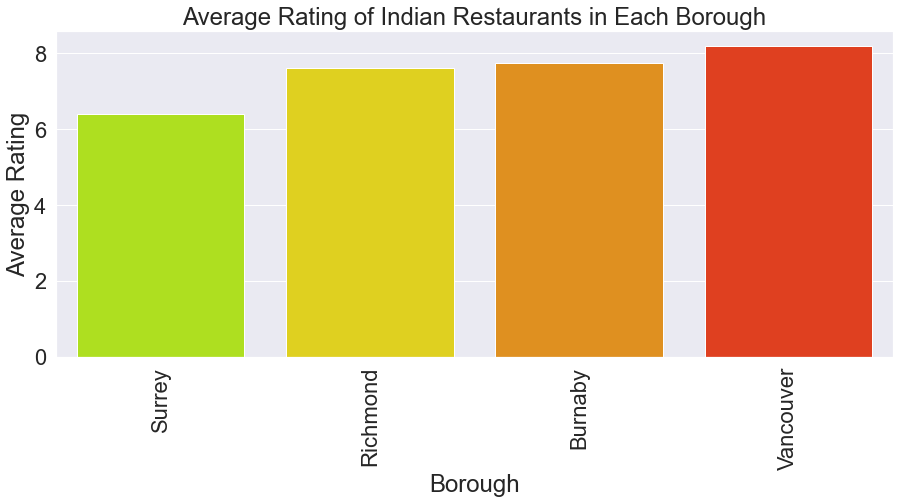

In [37]:
bc_borough_stats=bc_borough_stats.sort_values(by='Average Rating')
sns.set(style="darkgrid",font_scale=2,rc={'figure.figsize':(15,6)})
ax = sns.barplot(x="Borough", y="Average Rating", data=bc_borough_stats, palette="prism_r")
plt.title('Average Rating of Indian Restaurants in Each Borough')
plt.xticks(rotation=90)
plt.show()

# Top Neighborhoods for Indian Restaurants based on Average Ratings.

In [39]:
bc_neighborhood_stats=indian_rest_stats_bc_csv.groupby(['Neighbourhood'])['Rating'].mean().reset_index()
bc_neighborhood_stats.columns=['Neighbourhood','Average Rating']
bc_neighborhood_stats.sort_values(by='Average Rating',ascending=False).head()

,Neighbourhood,Average Rating
3,North Vancouver Northwest Central,9.000000
29,Vancouver (West Kensington / NE Riley Park-Lit...,8.525000
17,Vancouver (East Mount Pleasant),8.525000
14,Vancouver (Central Kitsilano),8.500000
27,Vancouver (South Renfrew-Collingwood),8.466667


In [40]:
avg_rating=8.0
best_bc_neighborhood_stats=bc_neighborhood_stats[bc_neighborhood_stats['Average Rating']>=avg_rating]
print(best_bc_neighborhood_stats.shape[0],'Indian Restaurants has average rating of', avg_rating, 'and above. \n Check the list below.')
best_bc_neighborhood_stats.sort_values(by='Average Rating',ascending=False)

16 Indian Restaurants has average rating of 8.0 and above. 
 Check the list below.


,Neighbourhood,Average Rating
3,North Vancouver Northwest Central,9.000000
17,Vancouver (East Mount Pleasant),8.525000
29,Vancouver (West Kensington / NE Riley Park-Lit...,8.525000
14,Vancouver (Central Kitsilano),8.500000
27,Vancouver (South Renfrew-Collingwood),8.466667
24,Vancouver (SE Riley Park-Little Mountain / SW ...,8.400000
4,North Vancouver South Central,8.366667
5,North Vancouver Southwest Central,8.366667
26,Vancouver (South Hastings-Sunrise / North Renf...,8.360000
25,Vancouver (South Grandview-Woodlands / NE Kens...,8.266667


# Merging DataFrame to get the Coordinates.

In [41]:
best_neighborhood_folium=pd.merge(best_bc_neighborhood_stats,df_1,how='inner',on='Neighbourhood')
best_neighborhood_folium=best_neighborhood_folium.rename(columns={'Borough_x':'Borough'})
best_neighborhood_folium=best_neighborhood_folium[['Borough','Neighbourhood','Average Rating','Latitude','Longitude']]
print('We have our required DatFrame ready to be plotted on a Map.')
best_neighborhood_folium=best_neighborhood_folium.sort_values(by='Average Rating', ascending=False).reset_index(drop=True)
best_neighborhood_folium['Average Rating']=best_neighborhood_folium['Average Rating'].round(2)# set precision to 2 decimal place
best_neighborhood_folium

We have our required DatFrame ready to be plotted on a Map.


,Borough,Neighbourhood,Average Rating,Latitude,Longitude
0,Vancouver,North Vancouver Northwest Central,9.00,49.3500,-123.0679
1,Vancouver,Vancouver (East Mount Pleasant),8.52,49.2620,-123.0923
2,Vancouver,Vancouver (West Kensington / NE Riley Park-Lit...,8.52,49.2480,-123.0913
3,Vancouver,Vancouver (Central Kitsilano),8.50,49.2646,-123.1648
4,Vancouver,Vancouver (South Renfrew-Collingwood),8.47,49.2397,-123.0407
5,Vancouver,Vancouver (SE Riley Park-Little Mountain / SW ...,8.40,49.2327,-123.0917
6,Vancouver,North Vancouver South Central,8.37,49.3160,-123.0576
7,Vancouver,North Vancouver Southwest Central,8.37,49.3222,-123.0834
8,Vancouver,Vancouver (South Hastings-Sunrise / North Renf...,8.36,49.2600,-123.0398
9,Vancouver,Vancouver (South Grandview-Woodlands / NE Kens...,8.27,49.2551,-123.0667


# Visualizing The Best of Neighborhoods based on Average Rating of 8.0 and above on Map.

In [47]:
from folium import plugins
best_neighborhood_avg_rating_map_2 = folium.Map(location=get_lat_long('V6B'), zoom_start=10, tiles='https://api.mapbox.com/styles/v1/explorer020/cka9yy2dn14l51iptugr1shzf/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiZXhwbG9yZXIwMjAiLCJhIjoiY2thOXhvYjdyMHJoYzJycDRlbmw3YTg3ZiJ9.T9QjJc87oYLSknnlBH21Tg',attr='XXX Mapbox Attribution')

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(best_neighborhood_avg_rating_map_2)

for lat, lng, rating, neighborhood in zip(best_neighborhood_folium['Latitude'], best_neighborhood_folium['Longitude'],best_neighborhood_folium['Average Rating'],best_neighborhood_folium['Neighbourhood']):
    label = '{},{}'.format(rating,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label).add_to(incidents)  
best_neighborhood_avg_rating_map_2.save('best_neighborhood_avg_rating_map_2.html')
best_neighborhood_avg_rating_map_2

# Conclusion
1. What is the best location in British Columbia for Indian Cuisine?

    Indian Fusion in Northern Vancouver has the highest rating to have Indian Food.


2. Which areas have potential Indian Restaurant Market?

    Surrey has the least rated Indian restaurants.
    For an investor, it's an opportunity to grab to come up with a high-quality restaurant.


3. Which all areas lack Indian Restaurants?

    Richmond and Burnaby have the lowest number of Indian Restaurants but are highly rated. For an investor, to come up with variety and quality is a challenge to conquer.


4. Which is the best place to stay if I prefer Indian Cuisine?

    Vancouver is the place where one should stay if they prefer Indian Cuisine. It has quality and variety both.

Limitations

1. Food habits and likings are completely relative.

2. Ranking of Borough, Neighborhood, and Restaurants are based on rating data fetched from FourSquare API.

3. Results may vary if more data is available.